Add project dir to the sys.path

In [45]:
'''
import sys, os
command_output = !pwd
notebook_dir = command_output[0]
project_dir = os.path.dirname(curr_dir)
os.path.basename
if project_dir not in sys.path:
    sys.path.append(project_dir)
'''  

'\nimport sys, os\ncommand_output = !pwd\nnotebook_dir = command_output[0]\nproject_dir = os.path.dirname(curr_dir)\nos.path.basename\nif project_dir not in sys.path:\n    sys.path.append(project_dir)\n'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [3]:
import utils as paac_utils

Training summaries should looks like this:

```
summary = list(
 (int training_step, namedtyple TrainingStats),
  ...
  ...
  ...
  (int training_step, namedtyple TrainingStats),
  (int training_step, namedtyple TrainingStats),
)
```

In [41]:
from collections import namedtuple
from operator import attrgetter

def get_reward_stats(summary):
    steps, stats = zip(*summary) 
    mean_r = list(map(attrgetter('mean_r'), stats))
    max_r = list(map(attrgetter('max_r'), stats))
    min_r = list(map(attrgetter('min_r'), stats))
    mean_steps = list(map(attrgetter('mean_steps'), stats))
    final_res = list(map(attrgetter('final_res'), stats))
    return {'steps':steps, 'min_r':min_r, 'max_r':max_r, "mean_r":mean_r, 'mean_steps':mean_steps,'final_res':final_res} 
    
def reward_plots(*summaries_names, 
                 title=None, cmap='nipy_spectral', ylim=None, xlim=None):
    fig = plt.figure(figsize=(16,8))
    if title:
        fig.suptitle(title)
    
    ax = fig.add_subplot(1, 1, 1)
    ax.set_ylabel('Success percentage')
    ax.set_xlabel('Emulation steps')
    x_lim = 0
    N = len(summaries_names)
    cmap = plt.get_cmap(cmap)
    colors = ['red', 'blue', 'black']#[cmap(i) for i in np.linspace(0, 1, N+2)][1:-1]
    line_handles = [None]*N
    for i, (summary, name) in enumerate(summaries_names):
        clr = colors[i]
        stats = get_reward_stats(summary)
        hdl, = ax.plot(stats['steps'], stats['final_res'], '-o' , color=clr, label=name, linewidth=1.)
        ax.fill_between(stats['steps'], stats['final_res'], stats['final_res'], alpha=0.1, facecolor=clr)
        line_handles[i] = hdl
        
        x_lim = max(x_lim, max(stats['steps']))
    
    #ax.set_xlim(0, x_lim)
    if xlim: ax.set_xlim(*xlim)
    else: ax.set_xlim(0, x_lim)
    if ylim: ax.set_ylim(*ylim)
    ax.legend(handles=line_handles, loc='best')
    plt.show()



In [42]:
lstm_summaries1 = paac_utils.load_summary('hundrrew_log_mls_10_len_15_20_reg/checkpoints/summaries.pkl4')
lstm_summaries2 = paac_utils.load_summary('hundrrew_log_mls_10_len_15_20_reg_g_1/checkpoints/summaries.pkl4')
lstm_summaries3 = paac_utils.load_summary('log_mls_10_len_15_20_reg/checkpoints/summaries.pkl4')
#selu_lstm_summaries = paac_utils.load_summary('../pretrained/vizdoom/basic_selu/checkpoints/summaries.pkl4')
#simpler_lstm_summaries = paac_utils.load_summary('hundrrew_log_mls_10_len_5_10_reg/checkpoints/summaries.pkl4')

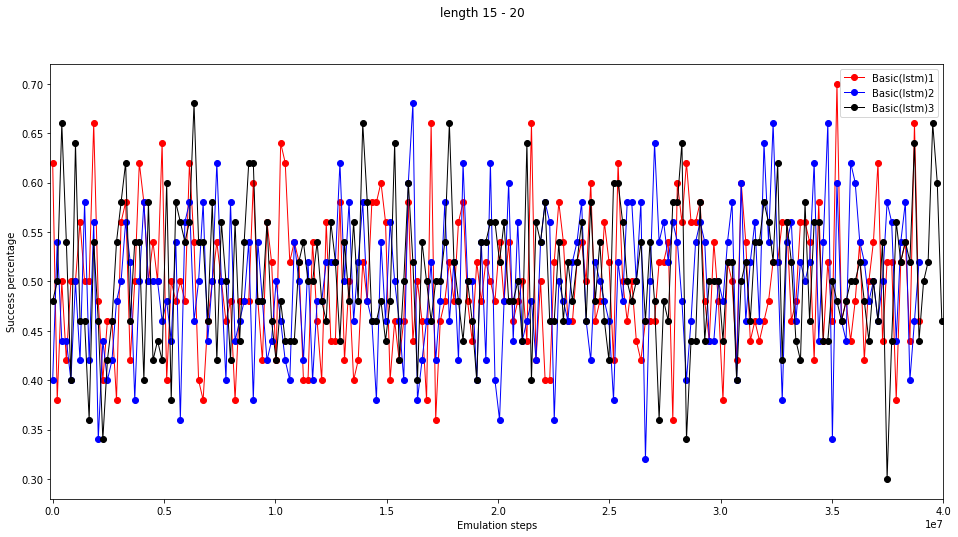

In [44]:
reward_plots(
    (lstm_summaries1, 'Basic(lstm)1'),
    #(selu_lstm_summaries, 'Basic(selu lstm)'),
    (lstm_summaries2, 'Basic(lstm)2'),
    (lstm_summaries3, 'Basic(lstm)3'),
    title='length 15 - 20', xlim=(-10**5, 40*(10**6)))

In [59]:
#!ls ../pretrained/atari/


In [54]:
def show_reward(log_folder, **kwargs):
    full_path = paac_utils.join_path(log_folder, 'checkpoints/summaries.pkl4')
    summary = paac_utils.load_summary(full_path)
    label = os.path.basename(log_folder)
    reward_plots(
    (summary, label),
    title='Rewards'.format(label), **kwargs)

/home/gaini/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:590: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f71d8ddffd0> has a label of '_line0' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


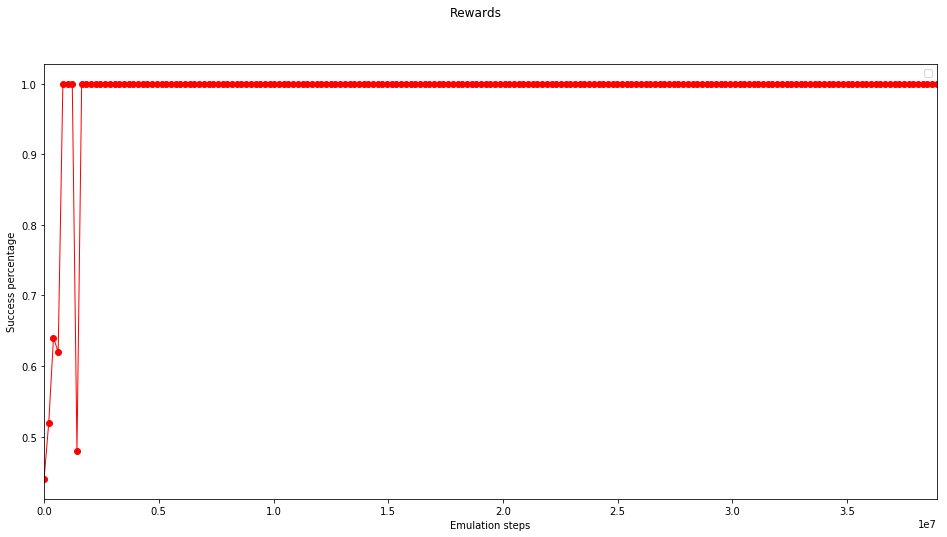

In [55]:
show_reward('hundrrew_log_mls_10_len_5_10_reg/')

In [56]:
#show_reward('../pretrained/atari/centipede_ff')

In [57]:
#show_atari_reward('../pretrained/atari/pong_lstm', xlim=(0, 8*10**7))

In [58]:
#show_atari_reward('../pretrained/atari/ms_pacman_lstm', xlim=(0, 8*10**7))